In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import plotly.graph_objects as go
import plotly.express as px
import numpy as np
import warnings
warnings.filterwarnings('ignore')
import os


In [2]:
data = pd.read_csv('../Data/TSLA.csv') #from yahoo website

In [3]:
data.dtypes

Date          object
Open         float64
High         float64
Low          float64
Close        float64
Adj Close    float64
Volume         int64
dtype: object

In [4]:
data['Date']= pd.to_datetime(data['Date'])


In [5]:
data.dtypes

Date         datetime64[ns]
Open                float64
High                float64
Low                 float64
Close               float64
Adj Close           float64
Volume                int64
dtype: object

In [6]:
data['Close'].describe()

count    1259.000000
mean      145.537898
std       113.468284
min        11.931333
25%        22.608666
50%       147.559998
75%       236.318329
max       409.970001
Name: Close, dtype: float64

Text(0.5, 1.0, 'Close Price over Time')

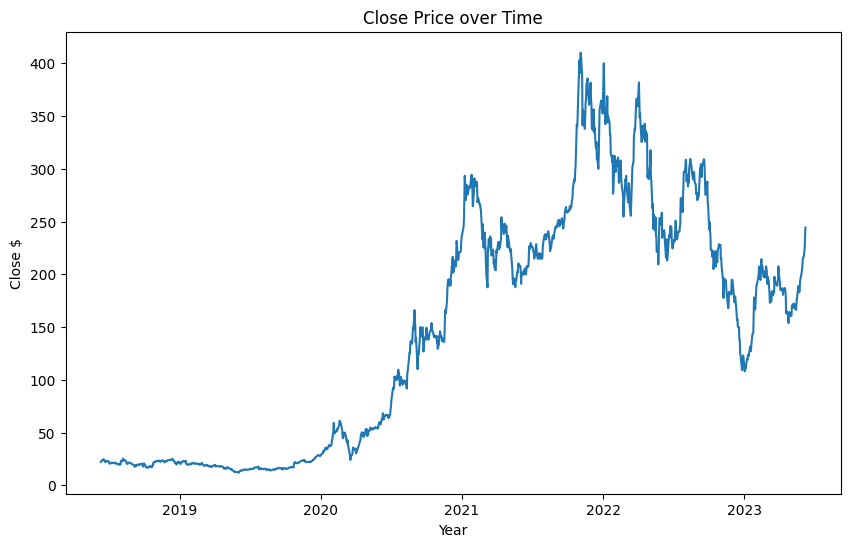

In [7]:
plt.figure(figsize=(10,6))
plt.plot(data['Date'],data['Close'])
plt.xlabel('Year') 
plt.ylabel('Close $') 
  
# displaying the title
plt.title("Close Price over Time")

In [8]:
data['Rolling'] = data['Close'].rolling(100).mean()

In [9]:
data

,Date,Open,High,Low,Close,Adj Close,Volume,Rolling
0,2018-06-11,21.500668,22.310667,21.500000,22.139999,22.139999,197752500,NaN
1,2018-06-12,22.980000,23.664667,22.533333,22.851334,22.851334,335211000,NaN
2,2018-06-13,23.114000,23.146667,22.653334,22.985332,22.985332,142047000,NaN
3,2018-06-14,23.175333,23.916668,23.106667,23.848000,23.848000,164715000,NaN
4,2018-06-15,23.589333,24.311333,23.416668,23.878000,23.878000,162724500,NaN
...,...,...,...,...,...,...,...,...
1254,2023-06-05,217.800003,221.289993,214.520004,217.610001,217.610001,151143100,180.0074
1255,2023-06-06,216.139999,221.910004,212.529999,221.309998,221.309998,146911600,180.9883
1256,2023-06-07,228.000000,230.830002,223.199997,224.570007,224.570007,185710800,181.9984
1257,2023-06-08,224.220001,235.229996,223.009995,234.860001,234.860001,164489700,183.1230


Text(0.5, 1.0, 'Close Price + Rolling 100 Day over Time')

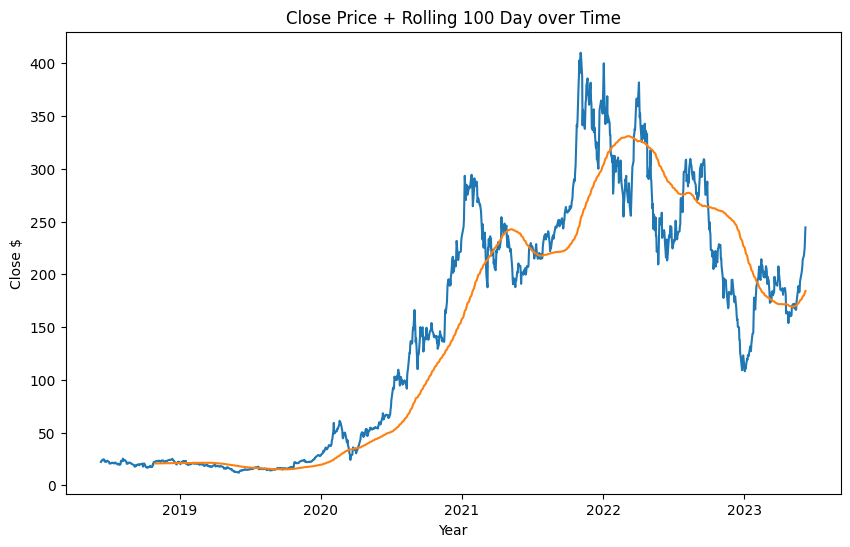

In [10]:
plt.figure(figsize=(10,6))
plt.plot(data['Date'],data['Close'])
plt.plot(data['Date'],data['Rolling'])
plt.xlabel('Year') 
plt.ylabel('Close $') 
  
# displaying the title
plt.title("Close Price + Rolling 100 Day over Time")

In [11]:
data['Year'] = data['Date'].dt.strftime('%Y')
data_year = data.groupby(['Year'])['Close'].mean()
data_year = data_year.reset_index()

Text(0.5, 1.0, 'Avg Close Price over Time')

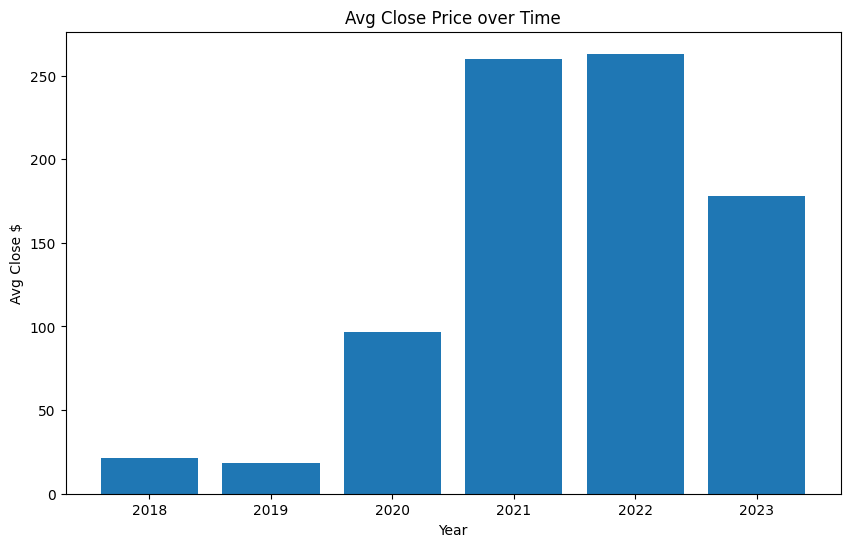

In [12]:
plt.figure(figsize=(10,6))
plt.bar(data_year['Year'],data_year['Close'])
plt.xlabel('Year') 
plt.ylabel('Avg Close $') 
  
# displaying the title
plt.title("Avg Close Price over Time")

In [13]:
fig = go.Figure(data=[go.Candlestick(x=data['Date'],
                open=data['Open'],
                high=data['High'],
                low=data['Low'],
                close=data['Close'])])


fig.update_layout(title = 'Daily Chart')
fig.update_xaxes(title="Year")
fig.update_yaxes(title="Close $")
fig.update_layout(xaxis_rangeslider_visible=False)
fig.show()


The candlestick chart is a style of financial chart describing open, high, low and close for a given x coordinate (most likely time). The boxes represent the spread between the open and close values and the lines represent the spread between the low and high values. Sample points where the close value is higher (lower) then the open value are called increasing (decreasing). By default, increasing candles are drawn in green whereas decreasing are drawn in red.

In [14]:
data['Change'] = data["Close"].diff()

change = data["Close"].diff()
#change.dropna(inplace=True)

change_up = change.copy()
change_down = change.copy()

# 
change_up[change_up<0] = 0
change_down[change_down>0] = 0


# Calculate the rolling average of average up and average down
avg_up = change_up.rolling(14).mean()
avg_down = change_down.rolling(14).mean().abs()

rsi = 100 - (100/(1+ avg_up /avg_down))
data['RSI'] = rsi

RSI stands for Relative Strength Index, and it is a popular technical indicator used in financial markets to analyze price movements of various assets, such as stocks

The RSI is typically displayed on a scale from 0 to 100. A reading above 70 is often considered overbought, suggesting that the asset may be due for a price correction or reversal. Conversely, a reading below 30 is often considered oversold, indicating that the asset may be poised for a price rebound.

Text(0.5, 1.0, 'RSI over Time')

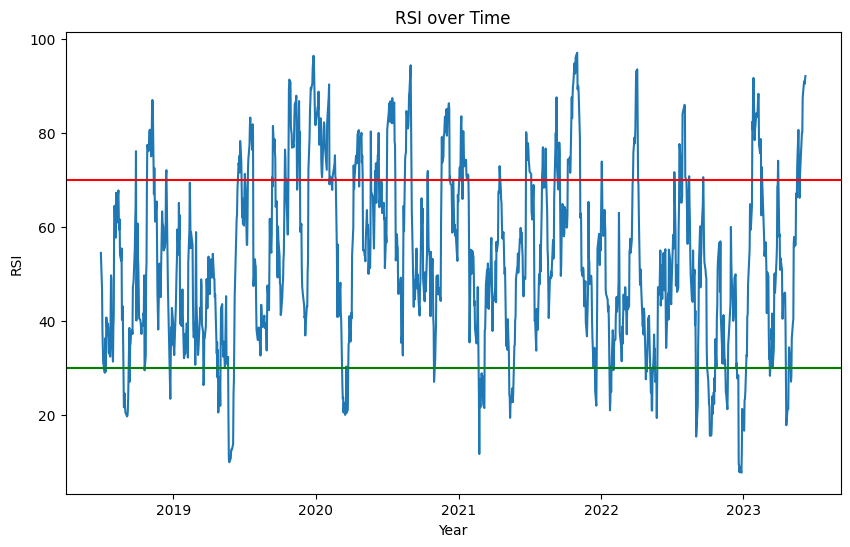

In [15]:
plt.figure(figsize=(10,6))
plt.plot(data['Date'],data['RSI'])

plt.xlabel('Year') 
plt.ylabel('RSI') 


plt.axhline(y=70, color='r', linestyle='-')
plt.axhline(y=30, color='g', linestyle='-')
  
# displaying the title
plt.title("RSI over Time")

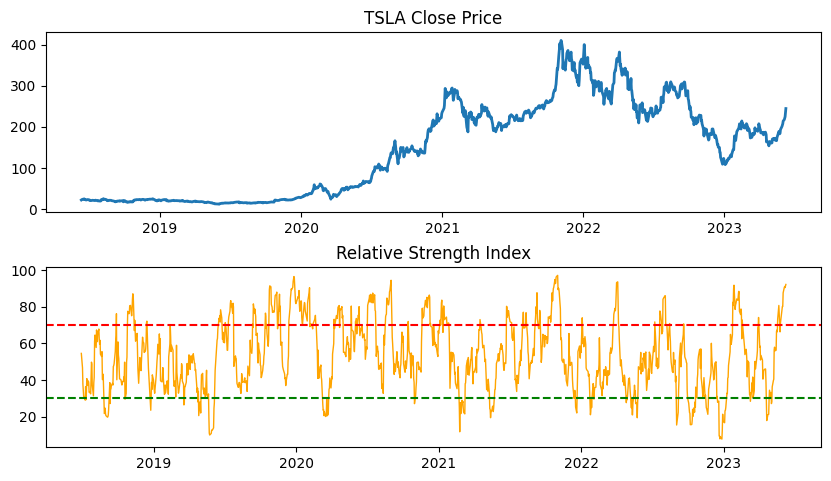

In [16]:
plt.figure(figsize=(10,6))
ax1 = plt.subplot2grid((10,1), (0,0), rowspan = 4, colspan = 1)
ax2 = plt.subplot2grid((10,1), (5,0), rowspan = 4, colspan = 1)

# First chart

# Plot the closing price on the first chart
ax1.plot(data['Date'],data['Close'], linewidth=2)
ax1.set_title('TSLA Close Price')

# Second chart

# Plot the RSI
ax2.set_title('Relative Strength Index')
ax2.plot(data['Date'],data['RSI'], color='orange', linewidth=1)
# Add two horizontal lines, signalling the RSI Ranges

# Oversold
ax2.axhline(30, linestyle='--', linewidth=1.5, color='green')
# Overbought
ax2.axhline(70, linestyle='--', linewidth=1.5, color='red')

plt.show()

In [17]:
data['Return'] = np.nan

for i in range(1, len(data)):
    data['Return'].iloc[i] = (data['Close'].iloc[i] - data['Close'].iloc[i-1]) / data['Close'].iloc[i-1]

In [18]:
plt.figure(figsize=(15,10))
fig = px.line(data,x = 'Date', y='Return')
fig.show()

<Figure size 1500x1000 with 0 Axes>